In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd


In [2]:
# Import the data
sms_df=pd.read_csv("./Resources/spam.csv", encoding = 'ISO-8859-1')

# sms_df.dropna(inplace=True)
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [4]:
sms_df['v2'] = sms_df['v2'].astype('str')
print(sms_df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [5]:
sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
sms_df["Count of Words"] = sms_df["v2"].apply(lambda n: len(n.split()))
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Count of Words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13


In [7]:
sms_ham=sms_df.loc[sms_df["v1"] =='ham']
sms_ham.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Count of Words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,20
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,6
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,13
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,16


In [8]:
mean_stats= sms_ham.groupby(["v1"])["Count of Words"].mean()
median_stats=sms_ham.groupby(["v1"])["Count of Words"].median()
var_stats=sms_ham.groupby(["v1"])["Count of Words"].var()
sd_stats=sms_ham.groupby(["v1"])["Count of Words"].std()
sem_stats=sms_ham.groupby(["v1"])["Count of Words"].sem()

In [9]:
# Assemble the resulting series into a single summary DataFrame.

statistics_summary= pd.DataFrame({"Mean Word Count": mean_stats, "Median Word Count": median_stats,
                                  "Word Count Variance": var_stats, "Word Count Std. Dev.": sd_stats,
                                 "Word Count Std. Err.": sem_stats})

statistics_summary.index.name= "Email Type"

statistics_summary

,Mean Word Count,Median Word Count,Word Count Variance,Word Count Std. Dev.,WOrd Count Std. Err.
Email Type,,,,,
ham,14.200622,11,130.519444,11.424511,0.164471


In [11]:
sms_spam=sms_df.loc[sms_df["v1"] =='spam']
sms_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Count of Words
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,28
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,32
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,26
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,29
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,26


In [12]:
mean_stats= sms_spam.groupby(["v1"])["Count of Words"].mean()
median_stats=sms_spam.groupby(["v1"])["Count of Words"].median()
var_stats=sms_spam.groupby(["v1"])["Count of Words"].var()
sd_stats=sms_spam.groupby(["v1"])["Count of Words"].std()
sem_stats=sms_spam.groupby(["v1"])["Count of Words"].sem()

In [13]:
# Assemble the resulting series into a single summary DataFrame.

statistics_summary= pd.DataFrame({"Mean Word Count": mean_stats, "Median Word Count": median_stats,
                                  "Word Count Variance": var_stats, "Word Count Std. Dev.": sd_stats,
                                 "Word Count Std. Err.": sem_stats})

statistics_summary.index.name= "Email Type"

statistics_summary

,Mean Word Count,Median Word Count,Word Count Variance,Word Count Std. Dev.,WOrd Count Std. Err.
Email Type,,,,,
spam,23.851406,25,33.778158,5.811898,0.212646


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
email_type=['spam', 'ham']

# Create empty list to fill with tumor vol data (for plotting)
word_count=[]

for x in email_type:
    word= sms_df.loc[sms_df["v1"]==x,"Count of Words"]
    word_count.append(word)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 # Locate the rows which contain mice on each drug and get the tumor volumes

    quartiles=word.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

 # add subset


 # Determine outliers using upper and lower bounds
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    outliers=word.loc[(word>upper_bound)|(word<lower_bound)]
    outliers
    print(f'{x}\'s  potential outliers: {outliers}')

spam's  potential outliers: 190     10
414      6
540     10
575     12
659      9
671      7
712      5
751      9
954      7
1117    11
1195     8
1216     8
1273    12
1429    12
1776     6
2078     3
2268     6
2294     8
2547    11
2698     5
2802     4
2861    10
2939     8
3270     8
3300     8
3420    12
3461    12
3560    12
3740     2
3753    12
3860     6
3979     2
3986    12
4014    12
4045    10
4211    11
4392    12
4471     8
4473    11
4512    12
4819    10
5110     8
5120     7
5381     7
5449    12
5466     5
Name: Count of Words, dtype: int64
ham's  potential outliers: 31      41
53      55
91      39
98      39
126     46
        ..
5484    39
5515    56
5535    61
5555    38
5557    48
Name: Count of Words, Length: 132, dtype: int64


C:\Users\colle\anaconda36\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


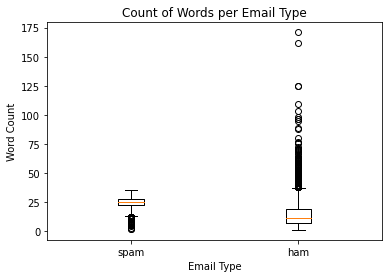

In [17]:
fig1, ax1=plt.subplots()
ax1.set_xlabel("Email Type")
ax1.set_ylabel("Word Count")
ax1.set_title("Count of Words per Email Type")
xticks=[1,2,3,4]
ax1.set_xticklabels(["spam", "ham"])
ax1.boxplot(word_count)
plt.show()